# Table of Contents


1.   Problem Statement
  - 1.1   Introduction
  - 1.2   Data Source and Dataset 
2. Load the packages and data
3. Data profiling
  - 3.1 head
  - 3.2 info
  - 3.3 Pandas profiling
  - 3.4 Initial observations
4. Data normalization
  - 4.1 Converting Object Columns to int
  - 4.2 Working on Dubication/correct mapping of data
5. Identify patterns in the data
  - 5.1 Finding the correlation
  - 5.2 Plotting Parallel Cordinates
  - 5.3 Plotting Andrew curve
6. Data Standardization
7. Train Test Split
8. Modelling and Prediction  
9. Conclusion

# 1. Problem Statment

## 1.1 Introduction
**Gender Recognition by Voice and Speech Analysis**<br/>
This database was created to identify a voice as male or female, based upon acoustic properties of the voice and speech. The dataset consists of 3,168 recorded voice samples, collected from male and female speakers. The voice samples are pre-processed by acoustic analysis in R using the seewave and tuneR packages, with an analyzed frequency range of 0hz-280hz (human vocal range). The Dataset The following acoustic properties of each voice are measured and included within the CSV. So, now using these features we have to create a model which can differentiate and predict the Gender.   

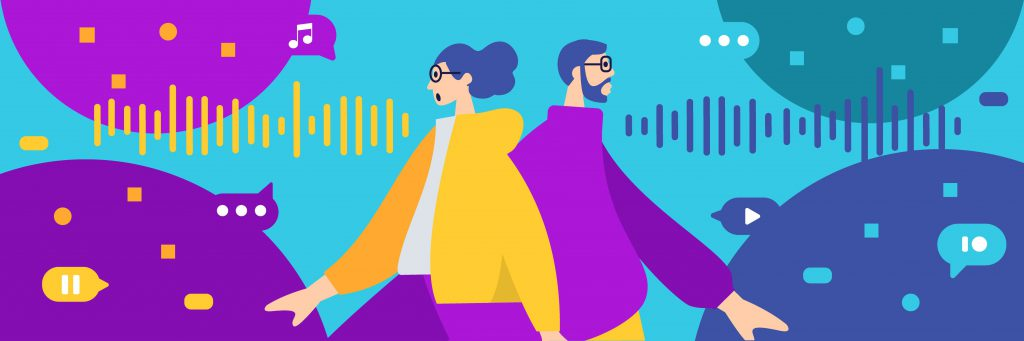

## 1.2  Data source and dataset
  - How was it collected?
> Name: "Gender Recognition by Voice and Speech Analysis"
> Sponsoring Organization: Insiad

  - Is it a sample? If yes, was it properly sampled?

  > Yes, it is a sample. We don't have official information about the data collection method, but it appears not to be a random sample, so we can assume that it is not representative.


The following acoustic properties of each voice are measured and included within the CSV:
*	meanfreq: mean frequency (in kHz)

*	sd: standard deviation of frequency

*	median: median frequency (in kHz)
*	Q25: first quantile (in kHz)
*	Q75: third quantile (in kHz)
*	IQR: interquantile range (in kHz)
*	skew: skewness (see note in specprop description)
*	kurt: kurtosis (see note in specprop description)
*	sp.ent: spectral entropy
*	sfm: spectral flatness
*	mode: mode frequency
*	centroid: frequency centroid (see specprop)
*	peakf: peak frequency (frequency with highest energy)
*	meanfun: average of fundamental frequency measured across acoustic signal
*	minfun: minimum fundamental frequency measured across acoustic signal
*	maxfun: maximum fundamental frequency measured across acoustic signal
*	meandom: average of dominant frequency measured across acoustic signal
*	mindom: minimum of dominant frequency measured across acoustic signal
*	maxdom: maximum of dominant frequency measured across acoustic signal
*	dfrange: range of dominant frequency measured across acoustic signal
*	modindx: modulation index. Calculated as the accumulated absolute difference between adjacent measurements of fundamental frequencies divided by the frequency range
*	label: male or female

# 2. Load the packages and data

In [ ]:
import sys                                                                      # Import packages
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import pie, axis, show
%matplotlib inline                                                              

import warnings                                                                 # Ignore warning related to pandas_profiling
warnings.filterwarnings('ignore') 

In [ ]:
# Loading Dataset
data = r'https://raw.githubusercontent.com/insaid2018/Term-3/master/Projects/gender_recognition_by_voice.csv';
df = pd.read_csv(data)


# 3. Data Profiling
Review the data types and sample data to understand what variables we are dealing with?
Which variables need to be transformed in some way before they can be analyzed?
## 3.1. Previewing the Dataset

In [ ]:
df.head(10)

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male
5,0.132786,0.079557,0.119090,0.067958,0.209592,0.141634,1.932562,8.308895,0.963181,0.738307,0.112555,0.132786,0.110132,0.017112,0.253968,0.298222,0.007812,2.726562,2.718750,0.125160,male
6,0.150762,0.074463,0.160106,0.092899,0.205718,0.112819,1.530643,5.987498,0.967573,0.762638,0.086197,0.150762,0.105945,0.026230,0.266667,0.479620,0.007812,5.312500,5.304688,0.123992,male
7,0.160514,0.076767,0.144337,0.110532,0.231962,0.121430,1.397156,4.766611,0.959255,0.719858,0.128324,0.160514,0.093052,0.017758,0.144144,0.301339,0.007812,0.539062,0.531250,0.283937,male
8,0.142239,0.078018,0.138587,0.088206,0.208587,0.120381,1.099746,4.070284,0.970723,0.770992,0.219103,0.142239,0.096729,0.017957,0.250000,0.336476,0.007812,2.164062,2.156250,0.148272,male
9,0.134329,0.080350,0.121451,0.075580,0.201957,0.126377,1.190368,4.787310,0.975246,0.804505,0.011699,0.134329,0.105881,0.019300,0.262295,0.340365,0.015625,4.695312,4.679688,0.089920,male


## 3.2. Data Info

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

## 3.3. Pandas Profiling

In [ ]:
# pip install pandas-profiling==2.5.0

In [ ]:
# from pandas_profiling import ProfileReport
# profile = ProfileReport(df, minimal=True)
# profile.to_file(output_file="output.html")

## 3.4. Initial Obersation after doing Pandas profiling

* Data set have 20 Numerical and 1 Category columns.
* We obesered there is no missing values in dataset.
* **Observations** for meanfreq, Q25, Q75, IQR, sp.ent, sfm columns
    * Left skewed distrubition.
    * No visible outliers
    * \>95% values are unique
* **Observations** for sd, mode, meanfun, meandom, [maxdom, dfrange (not many unique value)]
    * there is no clear distrubition.
    * no visible outliers
    * ~90% values are unique
* **Observations** for median, centroid
    * its a left skewed distrubition.
    * there is chances of outliers, as skeweness is out of range [-1,1]
    * big difference b/t min and Q1
    * 97.1% values are unique
* **Observations** for skew, kurt, minfun, mindom (not many unique value), modindx
    * no clear distrubition.
    * there is an outliers, as kurtosis and skeweness both are out of range.
    * 99.9% values are unique
* **Observations** for minfun, maxfun
    * no clear distrubition.
    * there is an outliers, as kurtosis and skeweness both are out of range.


# 4. Data normalization
## 4.1. Converting Object Column (Lable) into int

In [ ]:
# Converting Lable column from object to int
df.loc[df['label'] == 'male', 'label'] = 0
df.loc[df['label'] == 'female', 'label'] = 1
df['label'] = df['label'].astype('int64')

In [ ]:
df['label'].value_counts()

1    1584
0    1584
Name: label, dtype: int64

## 4.2. Checking missing and Zero values & frequency.

In [ ]:
missing_frame = pd.DataFrame(index = df.columns.values)
missing_frame['Null Frequency'] = df.isnull().sum().values
nullpercent = df.isnull().sum().values/df.shape[0]
missing_frame['Missing Null %age'] = np.round(nullpercent, decimals = 4) * 100
missing_frame['Zero Frequency'] = df[df == 0].count().values
zero_percent = df[df == 0].count().values / df.shape[0]
missing_frame['Missing %age'] = np.round(zero_percent, decimals = 4) * 100
missing_frame.transpose()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
Null Frequency,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0
Missing Null %age,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0
Zero Frequency,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,236.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,65.00,65.00,1584.0
Missing %age,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.45,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.05,2.05,50.0


#5. Identify patterns in the data
## 5.1. Finding the correlation between the columns

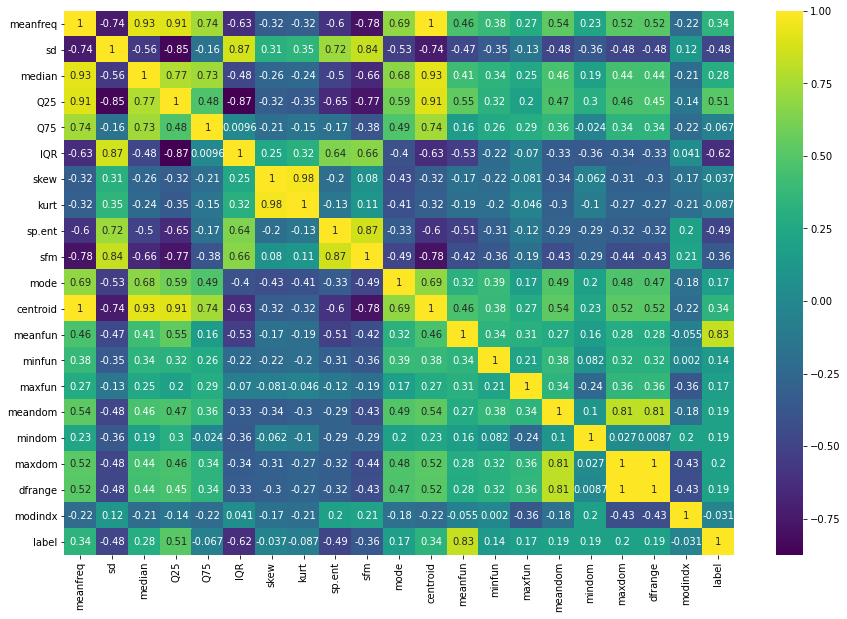

In [ ]:
corr_mat = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr_mat, annot=True, cmap='viridis')

**Observation** There are many columns which are highly corelated, but before going for dimensionality reduction we will check the model performance, as we don't want to remove any information, every information counts.
## 5.2 Plotting Parallel Cordinates

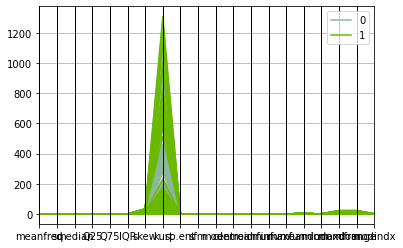

In [ ]:
from pandas.plotting import parallel_coordinates
parallel_coordinates(df, "label")

##5.3 Plotting Andrew curve

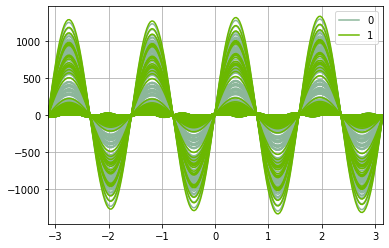

In [ ]:
# Andrews Curves involve using attributes of samples as coefficients for Fourier series and then plotting these
from pandas.plotting import andrews_curves
andrews_curves(df, "label")

#6. Data Standardization 
Standardizing the dataset using StandardScaler

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
Y = df.pop('label')
sc.fit(df)                                                                                   # fit the data to Standardscaler
X = sc.transform(df)                                                               # transform the data
print('After standardizing our features, the first 5 rows of our data now look like this:\n')   # print the first 5 value after standardization
print(pd.DataFrame(X, columns=df.columns).head())                                  # Put it to dataframe                              


After standardizing our features, the first 5 rows of our data now look like this:

   meanfreq        sd    median  ...    maxdom   dfrange   modindx
0 -4.049248  0.427355 -4.224901  ... -1.431422 -1.419137 -1.454772
1 -3.841053  0.611669 -3.999293  ... -1.418107 -1.405818 -1.014103
2 -3.463066  1.603848 -4.095851  ... -1.429203 -1.416917 -1.065344
3 -0.992157  0.899998 -0.759454  ... -1.273867 -1.261532  0.614286
4 -1.530640  1.322561 -1.676948  ...  0.124154  0.136933  0.289046

[5 rows x 20 columns]


#7. Train Test Split
Spliting the dataset into train and test dataset in the ratio of 75-25.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 42)

In [ ]:
print('There are {} samples in the training set and {} samples in the test set'.format(
X_train.shape[0], X_test.shape[0]))

There are 2376 samples in the training set and 792 samples in the test set


#8. Modelling and Prediction 
## 8.1. Importing different Models to check on which we are getting the best accuracy. 

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Create a list 
models = [LogisticRegression(),DecisionTreeClassifier(),KNeighborsClassifier()]

In [ ]:
# Using the different model on same dataset
print ("This is base model experiementation to decide benchmark models")
for eachModel in models:
  model = eachModel
  model.fit(X_train, Y_train)
  pred = model.predict(X_test)
  accuracy = accuracy_score(pred,Y_test)
  print (accuracy)

This is base model experiementation to decide benchmark models
0.9772727272727273
0.9583333333333334
0.9810606060606061


**Observation** KNN seems to be best out of these models, with ~98% accuracy

##8.2 Peforming k-fold Cross validation
Here we are doing 10 fold cross valdiation and using this we willl try to find the best fit of **K**

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
# Doing Cross validation
k_list = list(range(1,50,2))
cv_scores = []

# perform 10-fold cross validation
for k in k_list:
    knn = KNeighborsRegressor(n_neighbors=k)    
    scores = cross_val_score(knn, X_train, Y_train, cv=10, scoring='neg_mean_squared_error')
    cv_scores.append(scores.mean())

<Figure size 432x288 with 0 Axes>

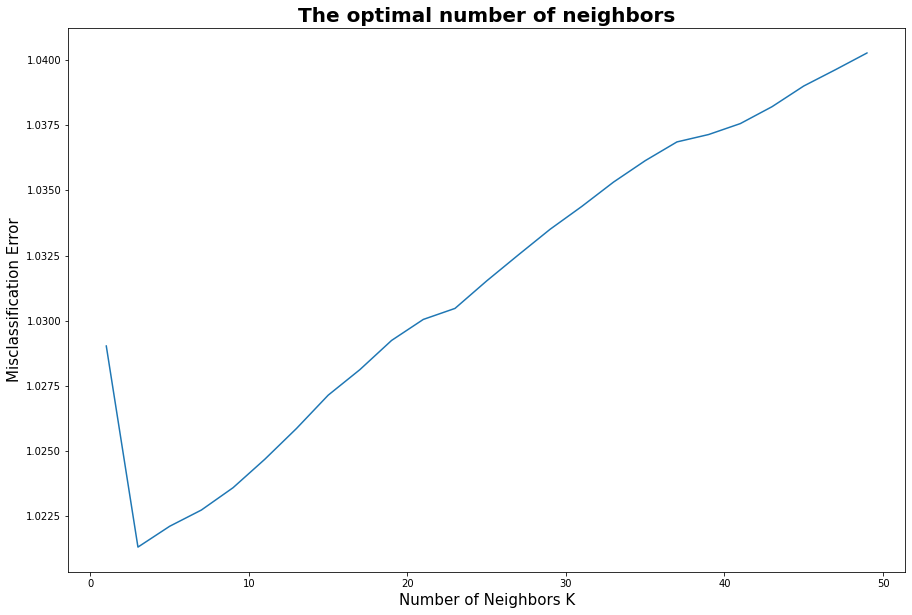

In [ ]:
# changing to misclassification error
MSE = [1 - x for x in cv_scores]

plt.figure()
plt.figure(figsize=(15,10))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_list, MSE)

plt.show()

##8.3 Using MSE we will try to find the optimal number of neighbors (k).

In [ ]:
# finding best k
best_k = k_list[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d." % best_k)

The optimal number of neighbors is 3.


## 8.4 Training Model on Optimal number of K
We are taining the model at k=3 which we got earlier and then we will calculate mse using it

In [ ]:
# Instantiate learning model (k = 3)
regressor = KNeighborsRegressor(n_neighbors=3)
regressor.fit(X_train, Y_train)
y_pred = regressor.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
mse = mean_squared_error(Y_test, y_pred)
rmse = sqrt(mse)
print('The MSE and RMSE is respectively:',mse, rmse )


The MSE and RMSE is respectively 0.01739618406285073 0.13189459451717772


#9. Conclusion
Out of all used model, KNN performed best out of those and the optimal value of K is 3 which we got after doing 10 fold cross validation over the model and also the same we can verify by checking the MSE and RMSE as well.